In [ ]:
import pandas as pd

In [ ]:
dt=pd.read_csv("/content/diabetes_012_health_indicators_BRFSS2015.csv")

In [ ]:
dt.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
dt.shape

(253680, 22)

In [ ]:
dt.dtypes



Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [ ]:
co_matrix=round(dt.corr(),2) #Making correlation matrix to show the relationship between variables.

In [ ]:
import seaborn as sb

In [ ]:
import matplotlib.pyplot as plt

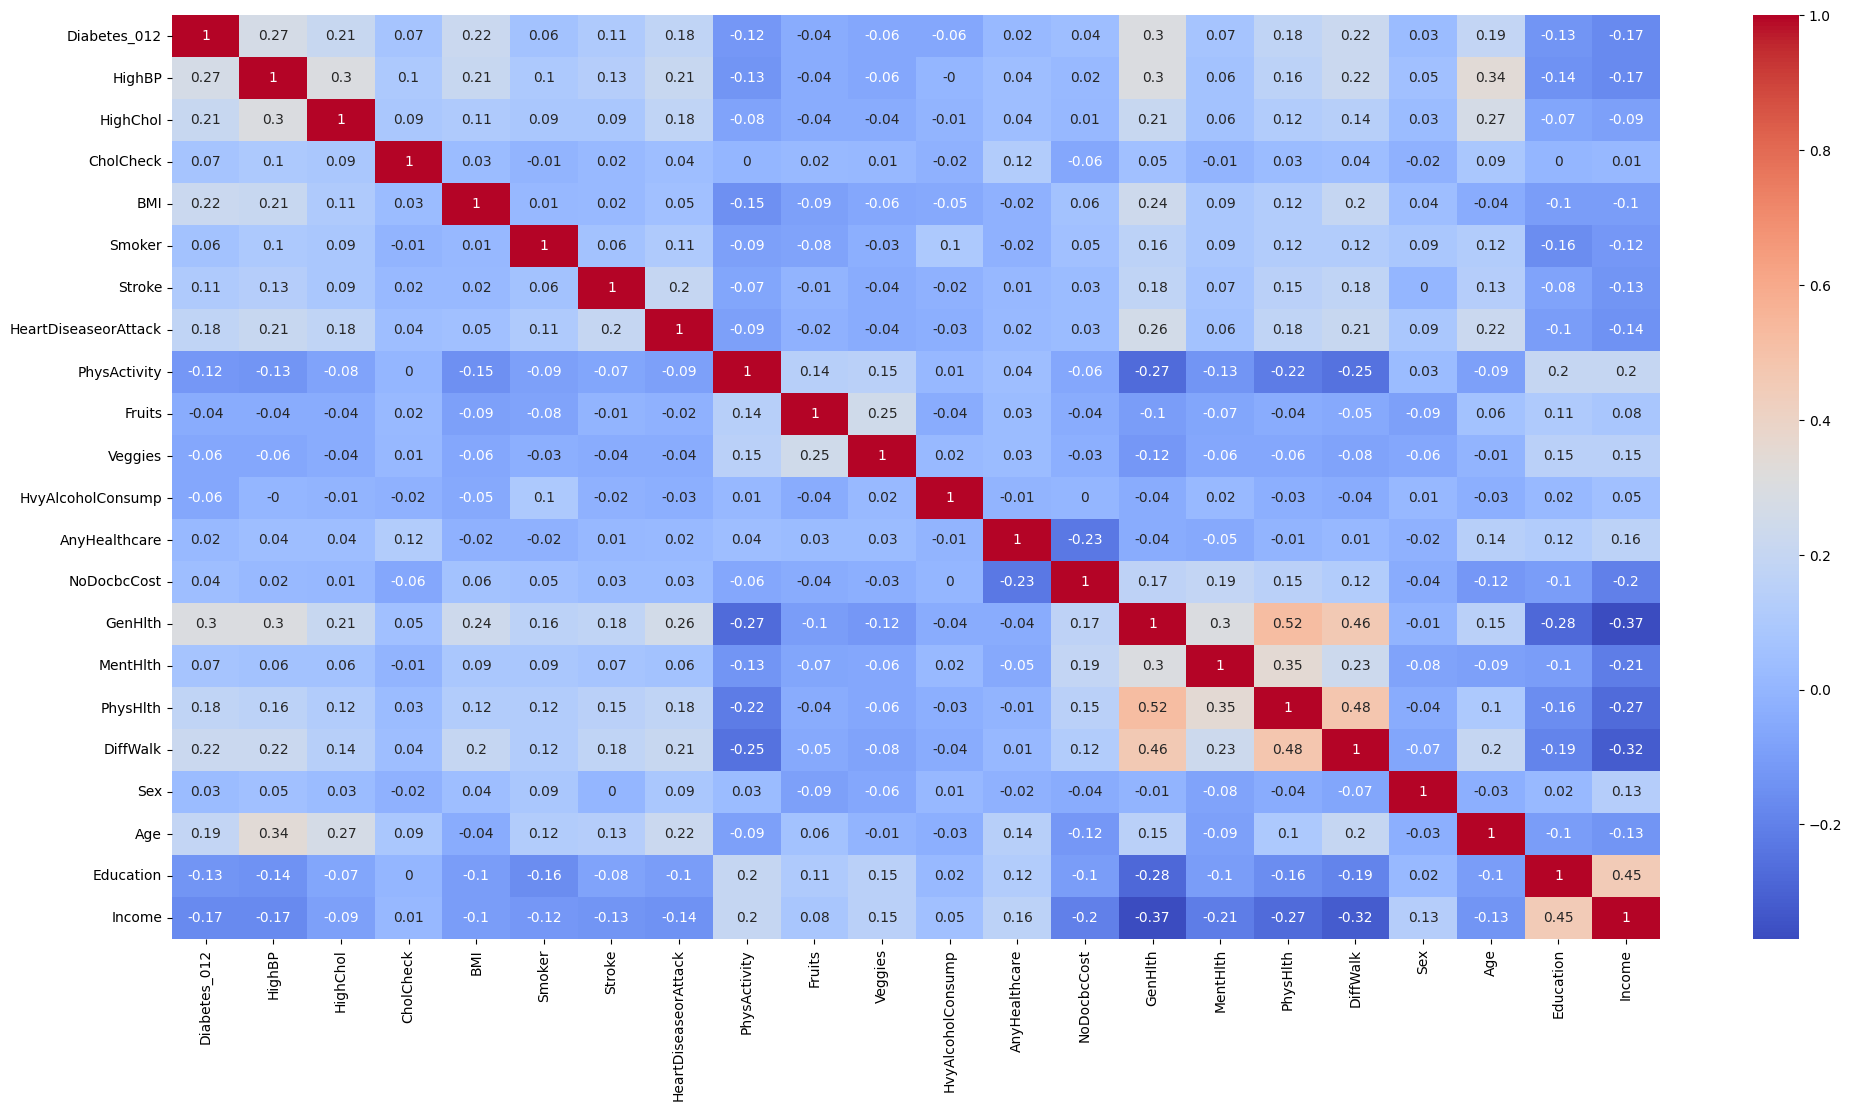

In [ ]:
plt.figure(figsize=(24,12))
sb.heatmap(co_matrix, annot=True, cmap="coolwarm")
plt.show()


In [ ]:
dt['Diabetes_012']=dt['Diabetes_012'].astype("category")

In [ ]:
dt.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
dt.isnull().sum().sum()

0

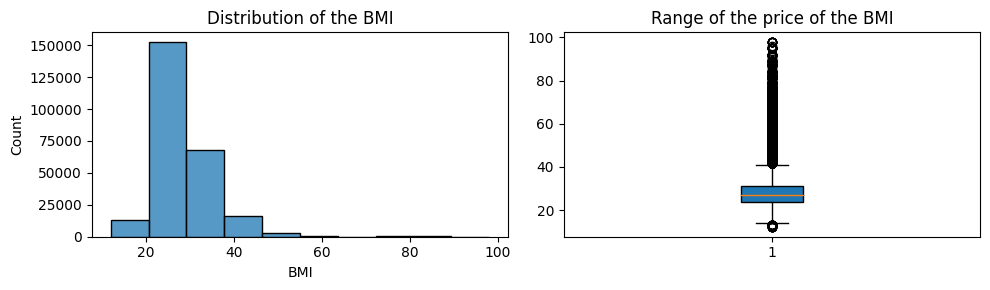

In [ ]:


#import warnings

#warnings.filterwarnings("ignore")

fig, axes = plt.subplots(1,2, figsize=(10,3)) #plt.subplots()::creates a figure and one row with two columns of subplots (1 row and 2 columns).

sb.histplot(dt['BMI'],bins=10,ax=axes[0]) #bin::number of bins (intervals) in the histogram.

plt.boxplot(dt['BMI'],patch_artist = True) #patch_artist::used to fill the boxes with colors in the box plot.

axes[0].set_title('Distribution of the BMI')

axes[1].set_title('Range of the price of the BMI')

plt.tight_layout()

plt.show()

In [ ]:
Q1=dt['BMI'].quantile(0.25)
Q3=dt['BMI'].quantile(0.75)
IQR= Q3 - Q1

In [ ]:
Q1

24.0

In [ ]:
Q3

31.0

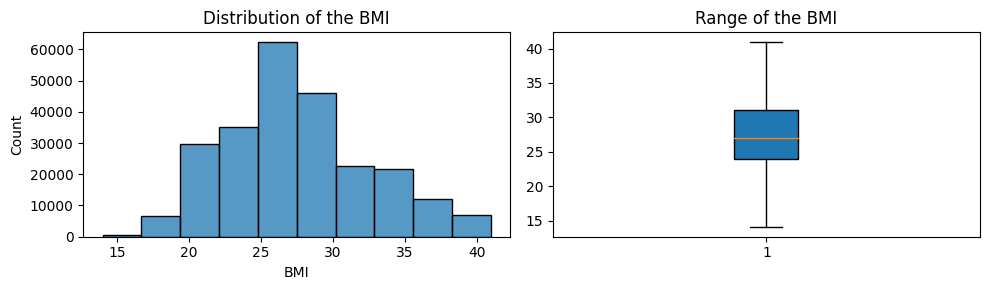

In [ ]:
Q1=dt['BMI'].quantile(0.25)
Q3=dt['BMI'].quantile(0.75)
IQR= Q3 - Q1
Upperbound_BMI = Q3 + 1.5*IQR
lowerbound_BMI = Q1 - 1.5*IQR
Index2=dt.loc[dt['BMI']>Upperbound_BMI,"BMI"].index
Index1=dt.loc[dt['BMI']<lowerbound_BMI,"BMI"].index
dt=dt.drop(Index2)
dt=dt.drop(Index1)
fig, axes = plt.subplots(1,2, figsize=(10,3))

sb.histplot(dt['BMI'],bins=10,ax=axes[0])

plt.boxplot(dt['BMI'],patch_artist = True)

axes[0].set_title('Distribution of the BMI')

axes[1].set_title('Range of the BMI')

plt.tight_layout()

plt.show()

In [ ]:
dt.shape

(243833, 22)

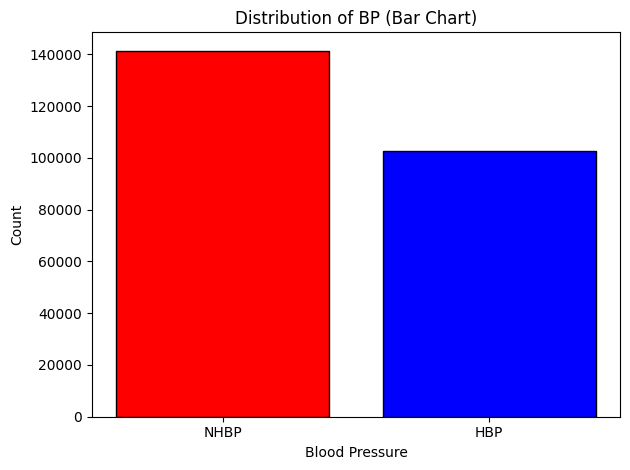

In [ ]:
bp1 = dt.loc[dt['HighBP'] == 0, ].shape[0] # .loc method is used to filter the DataFrame based on the condition
bp2 = dt.loc[dt['HighBP'] == 1, ].shape[0] #shape[0] is used to get the number of rows that meet the condition.


slice = [bp1,bp2]
labels = ["NHBP", "HBP"]

plt.bar(labels, slice, color=['red', 'blue'], edgecolor='black')

plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.title('Distribution of BP (Bar Chart)')

plt.tight_layout()
plt.show()


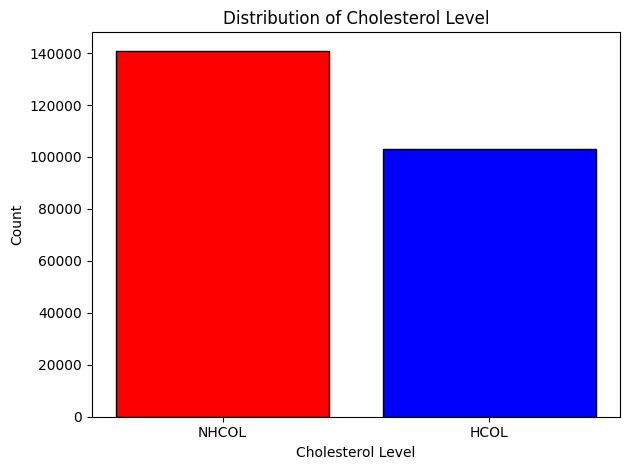

In [ ]:
col1 = dt.loc[dt['HighChol'] == 0, ].shape[0] # .loc method is used to filter the DataFrame based on the condition
col2 = dt.loc[dt['HighChol'] == 1, ].shape[0] #shape[0] is used to get the number of rows that meet the condition.


slice = [col1,col2]
labels = ["NHCOL", "HCOL"]

plt.bar(labels, slice, color=['red', 'blue'], edgecolor='black')

plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.title('Distribution of Cholesterol Level')

plt.tight_layout()
plt.show()


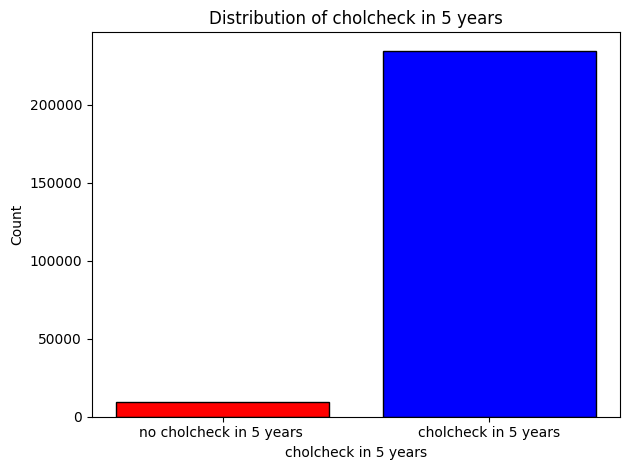

In [ ]:
colc1 = dt.loc[dt['CholCheck'] == 0, ].shape[0] # .loc method is used to filter the DataFrame based on the condition
colc2 = dt.loc[dt['CholCheck'] == 1, ].shape[0] #shape[0] is used to get the number of rows that meet the condition.


slice = [colc1,colc2]
labels = ["no cholcheck in 5 years ", "cholcheck in 5 years"]

plt.bar(labels, slice, color=['red', 'blue'], edgecolor='black')

plt.xlabel('cholcheck in 5 years')
plt.ylabel('Count')
plt.title('Distribution of cholcheck in 5 years')

plt.tight_layout()
plt.show()


In [ ]:
dt=dt.drop("CholCheck",axis=1)

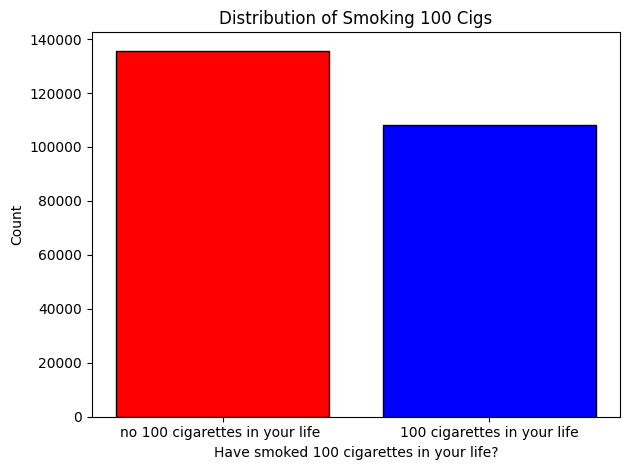

In [ ]:
somke1 = dt.loc[dt['Smoker'] == 0, ].shape[0] # .loc method is used to filter the DataFrame based on the condition
somke2 = dt.loc[dt['Smoker'] == 1, ].shape[0] #shape[0] is used to get the number of rows that meet the condition.


slice = [somke1,somke2]
labels = ["no 100 cigarettes in your life ", "100 cigarettes in your life"]

plt.bar(labels, slice, color=['red', 'blue'], edgecolor='black')

plt.xlabel('Have smoked 100 cigarettes in your life?')
plt.ylabel('Count')
plt.title('Distribution of Smoking 100 Cigs')

plt.tight_layout()
plt.show()


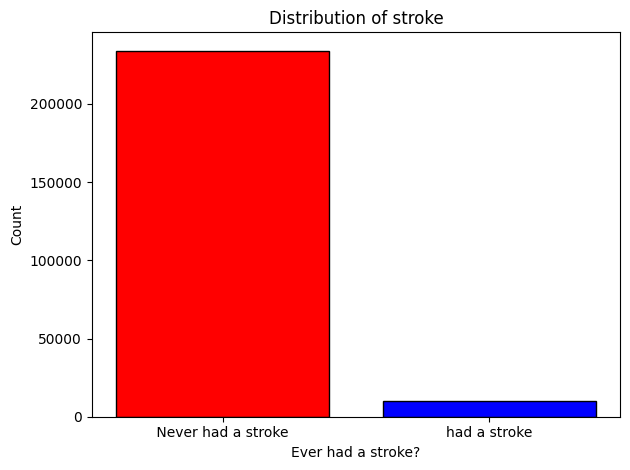

In [ ]:
str1 = dt.loc[dt['Stroke'] == 0, ].shape[0] # .loc method is used to filter the DataFrame based on the condition
str2 = dt.loc[dt['Stroke'] == 1, ].shape[0] #shape[0] is used to get the number of rows that meet the condition.


slice = [str1,str2]
labels = [" Never had a stroke ", "had a stroke"]

plt.bar(labels, slice, color=['red', 'blue'], edgecolor='black')

plt.xlabel('Ever had a stroke?')
plt.ylabel('Count')
plt.title('Distribution of stroke')

plt.tight_layout()
plt.show()


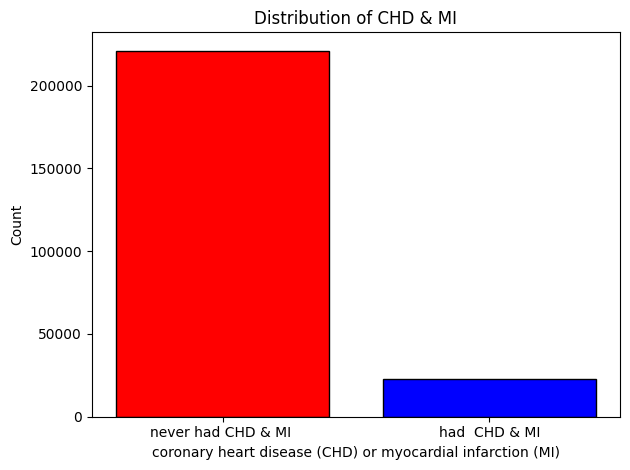

In [ ]:
ha1 = dt.loc[dt['HeartDiseaseorAttack']== 0, ].shape[0] # .loc method is used to filter the DataFrame based on the condition
ha2 = dt.loc[dt['HeartDiseaseorAttack'] == 1, ].shape[0] #shape[0] is used to get the number of rows that meet the condition.


slice = [ha1,ha2]
labels = ["never had CHD & MI ", "had  CHD & MI"]

plt.bar(labels, slice, color=['red', 'blue'], edgecolor='black')

plt.xlabel('coronary heart disease (CHD) or myocardial infarction (MI)')
plt.ylabel('Count')
plt.title('Distribution of CHD & MI')

plt.tight_layout()
plt.show()


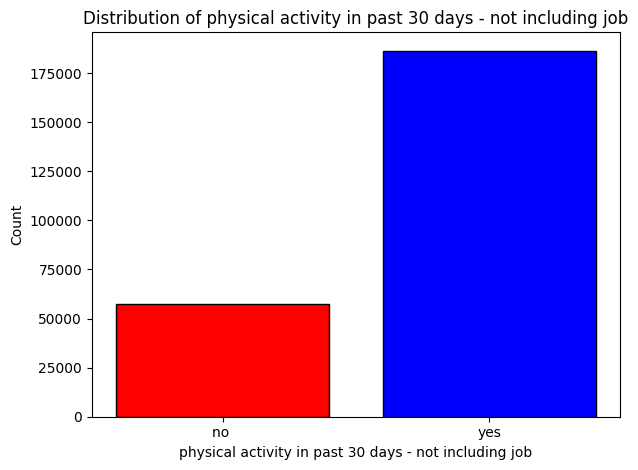

In [ ]:
pa1 = dt.loc[dt['PhysActivity']== 0, ].shape[0] # .loc method is used to filter the DataFrame based on the condition
pa2 = dt.loc[dt['PhysActivity'] == 1, ].shape[0] #shape[0] is used to get the number of rows that meet the condition.


slice = [pa1,pa2]
labels = ["no ", "yes"]

plt.bar(labels, slice, color=['red', 'blue'], edgecolor='black')

plt.xlabel('physical activity in past 30 days - not including job')
plt.ylabel('Count')
plt.title('Distribution of physical activity in past 30 days - not including job')

plt.tight_layout()
plt.show()


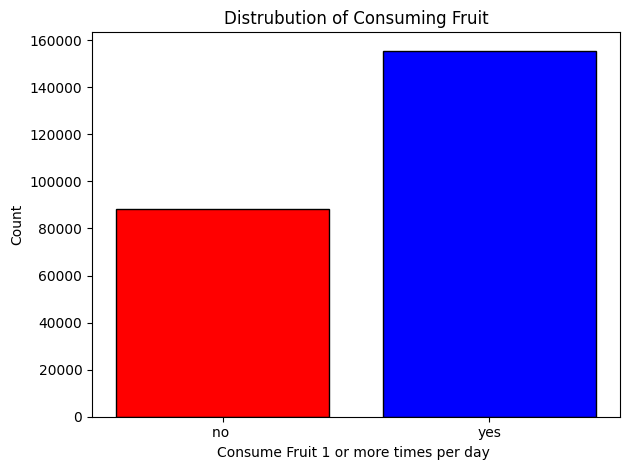

In [ ]:
f1 = dt.loc[dt['Fruits']== 0, ].shape[0] # .loc method is used to filter the DataFrame based on the condition
f2 = dt.loc[dt['Fruits'] == 1, ].shape[0] #shape[0] is used to get the number of rows that meet the condition.


slice = [f1,f2]
labels = ["no ", "yes"]

plt.bar(labels, slice, color=['red', 'blue'], edgecolor='black')

plt.xlabel('Consume Fruit 1 or more times per day ')
plt.ylabel('Count')
plt.title('Distrubution of Consuming Fruit')

plt.tight_layout()
plt.show()


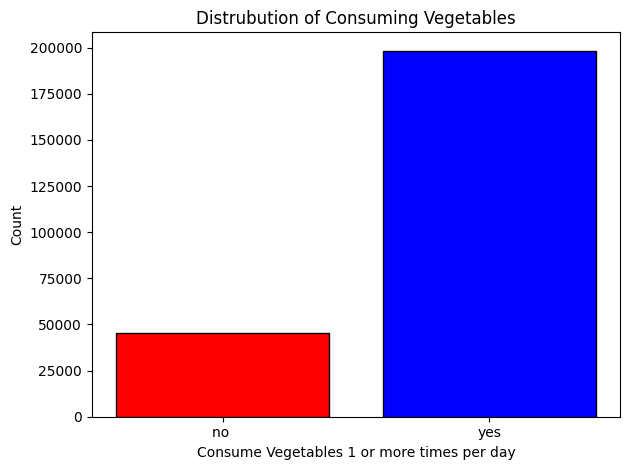

In [ ]:
v1 = dt.loc[dt['Veggies']== 0, ].shape[0] # .loc method is used to filter the DataFrame based on the condition
v2 = dt.loc[dt['Veggies'] == 1, ].shape[0] #shape[0] is used to get the number of rows that meet the condition.


slice = [v1,v2]
labels = ["no ", "yes"]

plt.bar(labels, slice, color=['red', 'blue'], edgecolor='black')

plt.xlabel('Consume Vegetables 1 or more times per day')
plt.ylabel('Count')
plt.title('Distrubution of Consuming Vegetables')

plt.tight_layout()
plt.show()


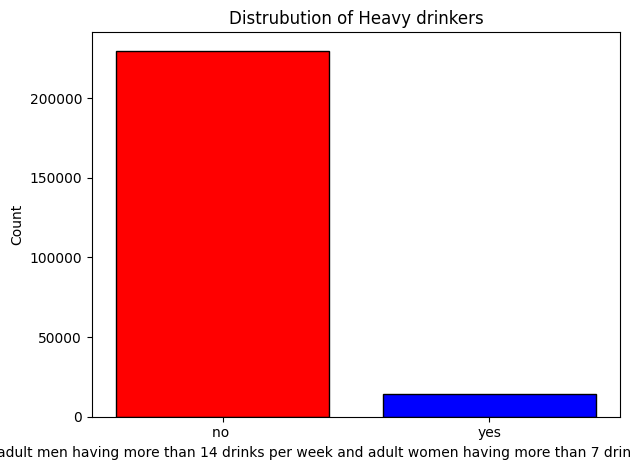

In [ ]:
hd1 = dt.loc[dt['HvyAlcoholConsump'] == 0, ].shape[0] # .loc method is used to filter the DataFrame based on the condition
hd2 = dt.loc[dt['HvyAlcoholConsump'] == 1, ].shape[0] #shape[0] is used to get the number of rows that meet the condition.


slice = [hd1,hd2]
labels = ["no ", "yes"]

plt.bar(labels, slice, color=['red', 'blue'], edgecolor='black')

plt.xlabel('adult men having more than 14 drinks per week and adult women having more than 7 drinks per week')
plt.ylabel('Count')
plt.title('Distrubution of Heavy drinkers')

plt.tight_layout()
plt.show()


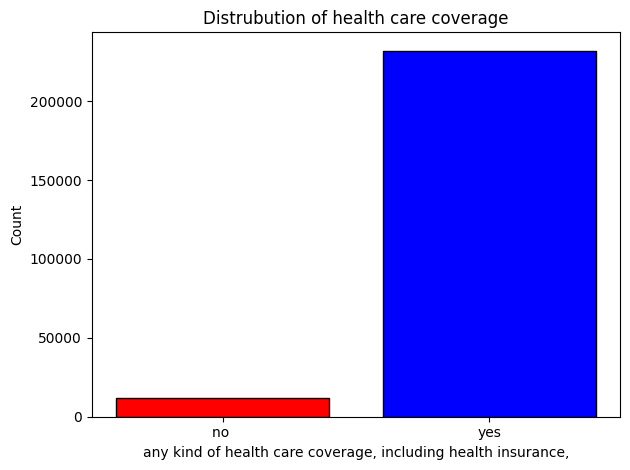

In [ ]:
hc1 = dt.loc[dt['AnyHealthcare'] == 0, ].shape[0] # .loc method is used to filter the DataFrame based on the condition
hc2 = dt.loc[dt['AnyHealthcare'] == 1, ].shape[0] #shape[0] is used to get the number of rows that meet the condition.


slice = [hc1,hc2]
labels = ["no ", "yes"]

plt.bar(labels, slice, color=['red', 'blue'], edgecolor='black')

plt.xlabel('any kind of health care coverage, including health insurance,')
plt.ylabel('Count')
plt.title('Distrubution of health care coverage')

plt.tight_layout()
plt.show()


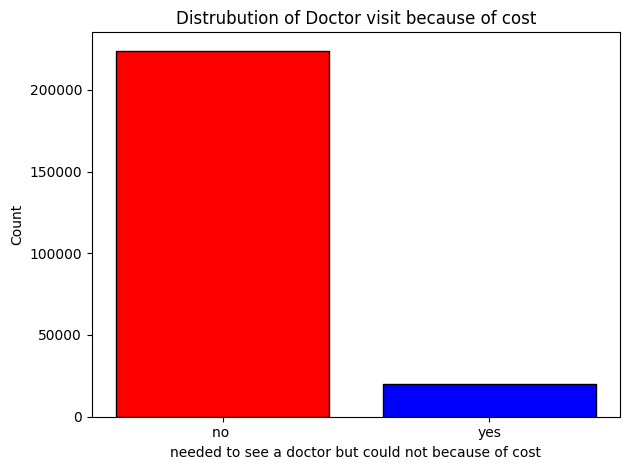

In [ ]:
dv1 = dt.loc[dt['NoDocbcCost'] == 0, ].shape[0] # .loc method is used to filter the DataFrame based on the condition
dv2 = dt.loc[dt['NoDocbcCost'] == 1, ].shape[0] #shape[0] is used to get the number of rows that meet the condition.


slice = [dv1,dv2]
labels = ["no ", "yes"]

plt.bar(labels, slice, color=['red', 'blue'], edgecolor='black')

plt.xlabel('needed to see a doctor but could not because of cost')
plt.ylabel('Count')
plt.title('Distrubution of Doctor visit because of cost')

plt.tight_layout()
plt.show()


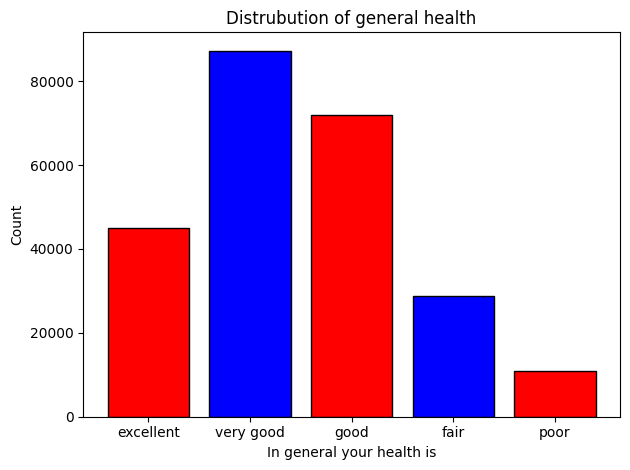

In [ ]:
gh1 = dt.loc[dt['GenHlth'] == 1, ].shape[0] # .loc method is used to filter the DataFrame based on the condition
gh2 = dt.loc[dt['GenHlth'] == 2, ].shape[0] #shape[0] is used to get the number of rows that meet the condition.
gh3 = dt.loc[dt['GenHlth'] == 3, ].shape[0]
gh4 = dt.loc[dt['GenHlth'] == 4, ].shape[0]
gh5 = dt.loc[dt['GenHlth'] == 5, ].shape[0]

slice = [gh1,gh2,gh3,gh4,gh5]
labels = ["excellent", "very good","good","fair","poor"]

plt.bar(labels, slice, color=['red', 'blue'], edgecolor='black')

plt.xlabel('In general your health is')
plt.ylabel('Count')
plt.title('Distrubution of general health')

plt.tight_layout()
plt.show()


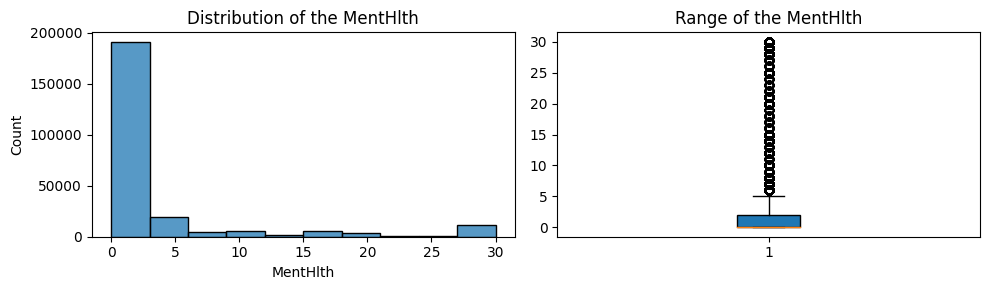

In [ ]:

#import warnings

#warnings.filterwarnings("ignore")

fig, axes = plt.subplots(1,2, figsize=(10,3)) #plt.subplots()::creates a figure and one row with two columns of subplots (1 row and 2 columns).

sb.histplot(dt['MentHlth'],bins=10,ax=axes[0]) #bin::number of bins (intervals) in the histogram.

plt.boxplot(dt['MentHlth'],patch_artist = True) #patch_artist::used to fill the boxes with colors in the box plot.

axes[0].set_title('Distribution of the MentHlth')

axes[1].set_title('Range of the MentHlth')

plt.tight_layout()

plt.show()

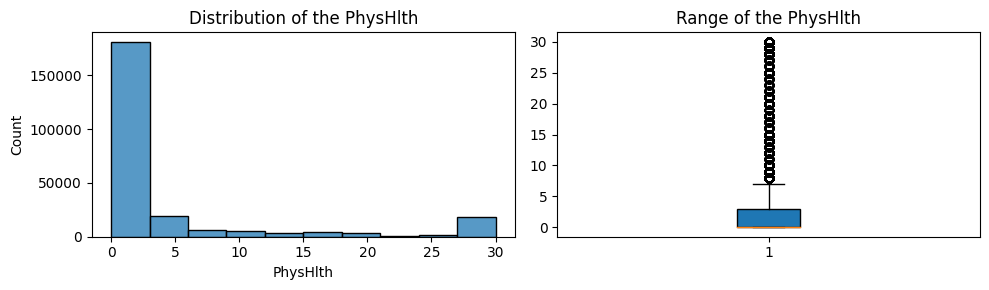

In [ ]:

#import warnings

#warnings.filterwarnings("ignore")

fig, axes = plt.subplots(1,2, figsize=(10,3)) #plt.subplots()::creates a figure and one row with two columns of subplots (1 row and 2 columns).

sb.histplot(dt['PhysHlth'],bins=10,ax=axes[0]) #bin::number of bins (intervals) in the histogram.

plt.boxplot(dt['PhysHlth'],patch_artist = True) #patch_artist::used to fill the boxes with colors in the box plot.

axes[0].set_title('Distribution of the PhysHlth')

axes[1].set_title('Range of the PhysHlth')

plt.tight_layout()

plt.show()

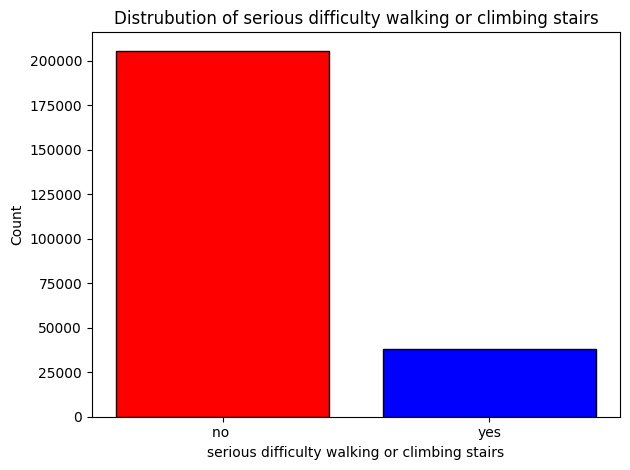

In [ ]:
dw1 = dt.loc[dt['DiffWalk'] == 0, ].shape[0] # .loc method is used to filter the DataFrame based on the condition
dw2 = dt.loc[dt['DiffWalk'] == 1, ].shape[0] #shape[0] is used to get the number of rows that meet the condition.


slice = [dw1,dw2]
labels = ["no ", "yes"]

plt.bar(labels, slice, color=['red', 'blue'], edgecolor='black')

plt.xlabel('serious difficulty walking or climbing stairs')
plt.ylabel('Count')
plt.title('Distrubution of serious difficulty walking or climbing stairs')

plt.tight_layout()
plt.show()


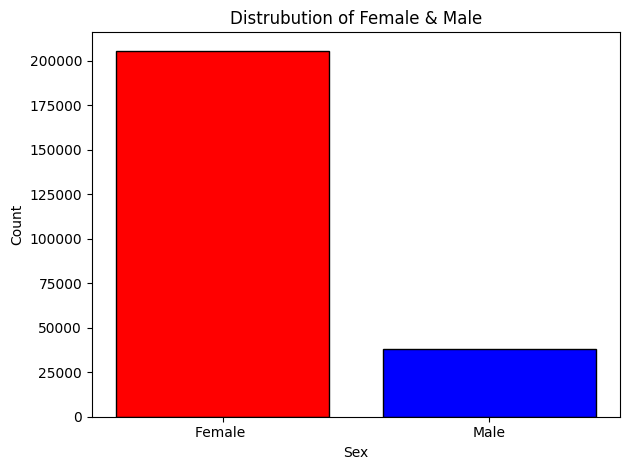

In [ ]:
sex1 = dt.loc[dt['DiffWalk'] == 0, ].shape[0] # .loc method is used to filter the DataFrame based on the condition
sex2 = dt.loc[dt['DiffWalk'] == 1, ].shape[0] #shape[0] is used to get the number of rows that meet the condition.


slice = [sex1,sex2]
labels = ["Female ", "Male"]

plt.bar(labels, slice, color=['red', 'blue'], edgecolor='black')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distrubution of Female & Male')

plt.tight_layout()
plt.show()


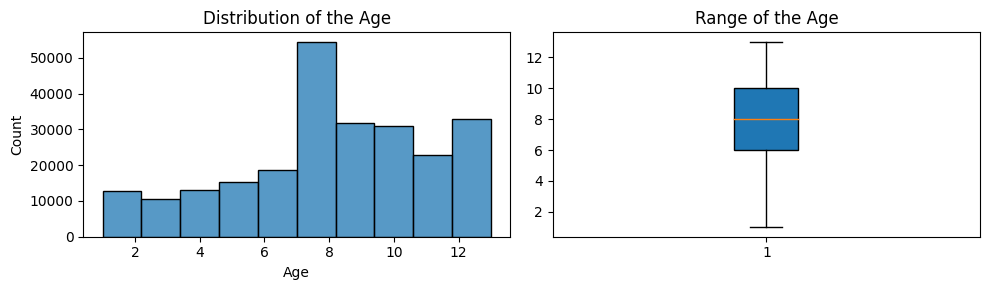

In [ ]:

#import warnings

#warnings.filterwarnings("ignore")

fig, axes = plt.subplots(1,2, figsize=(10,3)) #plt.subplots()::creates a figure and one row with two columns of subplots (1 row and 2 columns).

sb.histplot(dt['Age'],bins=10,ax=axes[0]) #bin::number of bins (intervals) in the histogram.

plt.boxplot(dt['Age'],patch_artist = True) #patch_artist::used to fill the boxes with colors in the box plot.

axes[0].set_title('Distribution of the Age')

axes[1].set_title('Range of the Age')

plt.tight_layout()

plt.show()

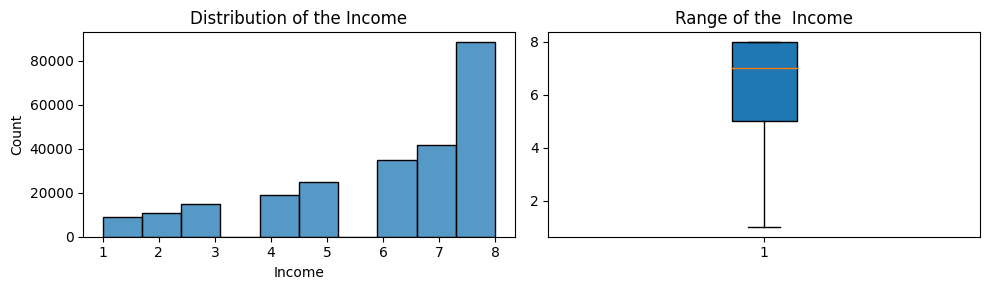

In [ ]:

#import warnings

#warnings.filterwarnings("ignore")

fig, axes = plt.subplots(1,2, figsize=(10,3)) #plt.subplots()::creates a figure and one row with two columns of subplots (1 row and 2 columns).

sb.histplot(dt['Income'],bins=10,ax=axes[0]) #bin::number of bins (intervals) in the histogram.

plt.boxplot(dt['Income'],patch_artist = True) #patch_artist::used to fill the boxes with colors in the box plot.

axes[0].set_title('Distribution of the Income')

axes[1].set_title('Range of the  Income')

plt.tight_layout()

plt.show()

In [ ]:
dfx=dt.drop("Diabetes_012",axis=1)

In [ ]:
dfy=dt['Diabetes_012']

In [ ]:
dt['Diabetes_012'].value_counts()

0.0    124553
2.0     18845
1.0      2646
Name: Diabetes_012, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

In [ ]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243833 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                243833 non-null  float64
 1   HighChol              243833 non-null  float64
 2   CholCheck             243833 non-null  float64
 3   BMI                   243833 non-null  float64
 4   Smoker                243833 non-null  float64
 5   Stroke                243833 non-null  float64
 6   HeartDiseaseorAttack  243833 non-null  float64
 7   PhysActivity          243833 non-null  float64
 8   Fruits                243833 non-null  float64
 9   Veggies               243833 non-null  float64
 10  HvyAlcoholConsump     243833 non-null  float64
 11  AnyHealthcare         243833 non-null  float64
 12  NoDocbcCost           243833 non-null  float64
 13  GenHlth               243833 non-null  float64
 14  MentHlth              243833 non-null  float64
 15  

In [ ]:
dfx.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
scaled_dfx = pd.DataFrame(ss.fit_transform(dfx),columns=dfx.columns)

In [ ]:
scaled_dfx.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.180431,1.169057,0.198009,2.508047,1.108825,-0.203765,-0.317384,-1.815806,-1.343087,0.478677,...,0.222280,-0.292705,2.408818,2.094141,1.307224,2.352647,-0.89403,0.295530,-1.117584,-1.560530
1,-0.847148,-0.855390,-5.050274,-0.511642,1.108825,-0.203765,-0.317384,0.550720,-1.343087,-2.089090,...,-4.498836,3.416408,0.509734,-0.418954,-0.470991,-0.425053,-0.89403,-0.359587,0.943723,-2.549929
2,1.180431,1.169057,0.198009,0.092296,-0.901855,-0.203765,-0.317384,-1.815806,0.744554,-2.089090,...,0.222280,3.416408,2.408818,3.769539,3.085439,2.352647,-0.89403,0.295530,-1.117584,0.912966
3,1.180431,-0.855390,0.198009,-0.109016,-0.901855,-0.203765,-0.317384,0.550720,0.744554,0.478677,...,0.222280,-0.292705,-0.439807,-0.418954,-0.470991,-0.425053,-0.89403,0.950648,-2.148237,-0.076432
4,1.180431,1.169057,0.198009,-0.712954,-0.901855,-0.203765,-0.317384,0.550720,0.744554,0.478677,...,0.222280,-0.292705,-0.439807,-0.000105,-0.470991,-0.425053,-0.89403,0.950648,-0.086930,-1.065831


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(scaled_dfx,dfy,test_size=0.2,random_state=42)

In [ ]:
y_train.value_counts()

0.0    165962
2.0     25646
1.0      3458
Name: Diabetes_012, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
S= SMOTE()

In [ ]:
xs_train,ys_train=S.fit_resample(x_train,y_train)

In [ ]:
ys_train.value_counts()

0.0    165962
1.0    165962
2.0    165962
Name: Diabetes_012, dtype: int64

In [ ]:
xs_train.shape

(497886, 21)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT=DecisionTreeClassifier()

In [ ]:
DT.fit(xs_train,ys_train)

DecisionTreeClassifier()

In [ ]:
pred_DT=DT.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
DT_acc=round(accuracy_score(pred_DT,y_test)*100,2)

In [ ]:
DT_acc

77.08

In [ ]:
cf_matrix_DT= confusion_matrix(y_test,pred_DT)
cf_matrix_DT

array([[35589,   906,  5057],
       [  635,    32,   215],
       [ 4106,   260,  1967]])

In [ ]:
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

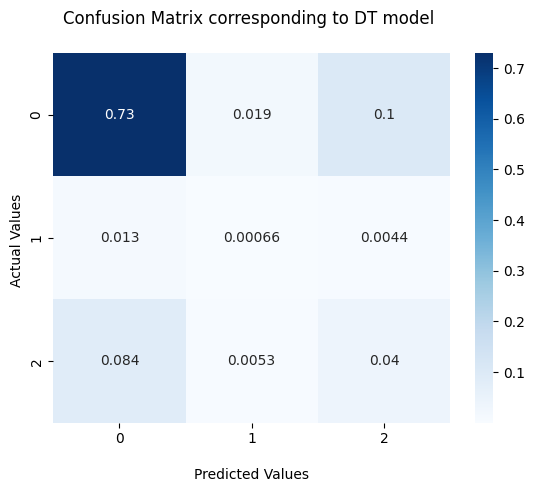

In [ ]:
ax = sb.heatmap(((cf_matrix_DT)/np.sum(cf_matrix_DT)), annot=True, cmap='Blues')

ax.set_title('Confusion Matrix corresponding to DT model \n')

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order

class_labels = ['0', '1', '2']
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

plt.show()

In [ ]:
repot_DT=classification_report(pred_DT,y_test)

In [ ]:
print(repot_DT)

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87     40330
         1.0       0.04      0.03      0.03      1198
         2.0       0.31      0.27      0.29      7239

    accuracy                           0.77     48767
   macro avg       0.40      0.39      0.40     48767
weighted avg       0.76      0.77      0.76     48767



In [ ]:
param_grid_DT = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(estimator=DT, param_grid=param_grid_DT, cv=5)
grid_search.fit(xs_train, ys_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]})

In [ ]:
print("Best parameters found by grid search:")
print(grid_search.best_params_)

Best parameters found by grid search:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [ ]:
pred_DT_grid=grid_search.predict(x_test)

In [ ]:
repot_DT_grid=classification_report(pred_DT_grid,y_test)

In [ ]:
print(repot_DT_grid)

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88     41868
         1.0       0.03      0.03      0.03       832
         2.0       0.28      0.30      0.29      6067

    accuracy                           0.79     48767
   macro avg       0.40      0.40      0.40     48767
weighted avg       0.80      0.79      0.80     48767



In [ ]:
cf_matrix_DT_grid= confusion_matrix(y_test,pred_DT_grid)
cf_matrix_DT_grid

array([[36868,   591,  4093],
       [  670,    29,   183],
       [ 4330,   212,  1791]])

In [ ]:
np.unique(pred_DT_grid)

array([0., 1., 2.])

In [ ]:
unique_values, counts = np.unique(pred_DT_grid, return_counts=True)

print("Prediction results:")
for value, count in zip(unique_values, counts):
    print(f"{value} occurs {count} times")

Prediction results:
0.0 occurs 41868 times
1.0 occurs 832 times
2.0 occurs 6067 times


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF=RandomForestClassifier()

In [ ]:
RF.fit(xs_train,ys_train)

RandomForestClassifier()

In [ ]:
pred_RF=RF.predict(x_test)

In [ ]:
RF_acc=round(accuracy_score(pred_RF,y_test)*100,2)
RF_acc

83.43

In [ ]:
cf_matrix_RF= confusion_matrix(y_test,pred_RF)
cf_matrix_RF

array([[38712,    98,  2742],
       [  692,     2,   188],
       [ 4332,    27,  1974]])

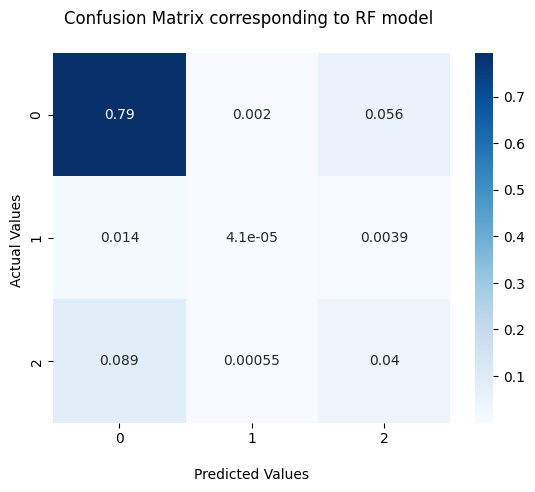

In [ ]:
ax = sb.heatmap(((cf_matrix_RF)/np.sum(cf_matrix_RF)), annot=True, cmap='Blues')

ax.set_title('Confusion Matrix corresponding to RF model \n')

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order

class_labels = ['0', '1', '2']
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

plt.show()

In [ ]:
repot_RF=classification_report(pred_RF,y_test)

In [ ]:
print(repot_RF)

              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91     43736
         1.0       0.00      0.02      0.00       127
         2.0       0.31      0.40      0.35      4904

    accuracy                           0.83     48767
   macro avg       0.42      0.43      0.42     48767
weighted avg       0.87      0.83      0.85     48767



In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243833 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Diabetes_012          243833 non-null  category
 1   HighBP                243833 non-null  float64 
 2   HighChol              243833 non-null  float64 
 3   CholCheck             243833 non-null  float64 
 4   BMI                   243833 non-null  float64 
 5   Smoker                243833 non-null  float64 
 6   Stroke                243833 non-null  float64 
 7   HeartDiseaseorAttack  243833 non-null  float64 
 8   PhysActivity          243833 non-null  float64 
 9   Fruits                243833 non-null  float64 
 10  Veggies               243833 non-null  float64 
 11  HvyAlcoholConsump     243833 non-null  float64 
 12  AnyHealthcare         243833 non-null  float64 
 13  NoDocbcCost           243833 non-null  float64 
 14  GenHlth               243833 non-nul

In [ ]:
data_NN=dt.values

In [ ]:
data_NN

array([[0., 1., 1., ..., 9., 4., 3.],
       [0., 0., 0., ..., 7., 6., 1.],
       [0., 1., 1., ..., 9., 4., 8.],
       ...,
       [0., 0., 0., ..., 2., 5., 2.],
       [0., 1., 0., ..., 7., 5., 1.],
       [2., 1., 1., ..., 9., 6., 2.]])

In [ ]:
X= data_NN[:,1:22]
Y = data_NN[:,0]

In [ ]:
from sklearn import preprocessing

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale=min_max_scaler.fit_transform(X)

In [ ]:
X_scale

array([[1.        , 1.        , 1.        , ..., 0.66666667, 0.6       ,
        0.28571429],
       [0.        , 0.        , 0.        , ..., 0.5       , 1.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.66666667, 0.6       ,
        1.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.08333333, 0.8       ,
        0.14285714],
       [1.        , 0.        , 1.        , ..., 0.5       , 0.8       ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.66666667, 1.        ,
        0.14285714]])

In [ ]:
import numpy as np

In [ ]:
np.isnan(X_scale).sum()

0

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xn_train, xn_val_and_test, yn_train, yn_val_and_test= train_test_split(X_scale, Y, test_size=(0.3))

In [ ]:
xn_val, xn_test, yn_val, yn_test= train_test_split(xn_val_and_test, yn_val_and_test, test_size=(0.5))

In [ ]:
print(xn_train.shape, xn_val.shape)

(170683, 21) (36575, 21)


In [ ]:
import numpy as np

In [ ]:
np.isnan(X_scale).sum()

13

In [ ]:
valid_indices = np.logical_not(np.isnan(X_scale).any(axis=1))

In [ ]:
X_scale_cleaned = X_scale[valid_indices]

In [ ]:
Y_cleaned=Y[valid_indices]

In [ ]:
xns_train,yns_train=S.fit_resample(xn_train,yn_train)

In [ ]:
xns_train.shape

(435645, 21)

In [ ]:
xns_test,yns_test=S.fit_resample(xn_test,yn_test)

In [ ]:
xns_val,yns_val=S.fit_resample(xn_val,yn_val)

In [ ]:
import numpy as np

In [ ]:
def augment_data(X, y, factor=2):
    augmented_X = []
    augmented_y = []
    for i in range(len(X)):
        for _ in range(factor):
            # Apply your data augmentation techniques here
            # Example: add noise, shuffle, modify features, etc.
            augmented_sample = X[i]  # Placeholder, replace with actual augmentation
            augmented_X.append(augmented_sample)
            augmented_y.append(y[i])
    return np.array(augmented_X), np.array(augmented_y)

In [ ]:
X_train_augmented, y_train_augmented = augment_data(xn_train, yn_train)

In [ ]:
np.isnan(X_train_augmented).sum()

34

In [ ]:
valid_indices = np.logical_not(np.isnan(X_train_augmented).any(axis=1))

In [ ]:
X_train_augmented_cleaned = X_train_augmented[valid_indices]

In [ ]:
np.isnan(X_train_augmented_cleaned).sum()

0

In [ ]:
y_train_augmented_cleaned=y_train_augmented[valid_indices]

In [ ]:
np.isnan(y_train_augmented_cleaned).sum()

0

In [ ]:
X_train_augmented_cleaned[-12]

array([0.        , 1.        , 1.        , 0.62962963, 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 1.        , 0.5       , 0.        ,
       0.        , 0.        , 0.        , 0.75      , 0.6       ,
       0.71428571])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
from keras.initializers import he_uniform

In [ ]:
from keras import regularizers

In [ ]:
model = Sequential([Dense(64,kernel_regularizer = regularizers.l2(0.001), activation='relu', input_shape=(21,)),
    Dropout(0.5),
    Dense(64,kernel_regularizer = regularizers.l2(0.001), activation='relu'),
    Dropout(0.5),
    #Dense(16, activation='relu'),
    #Dropout(0.2),
    Dense(3, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(xns_train,yns_train,
                 batch_size=32, epochs=100,
                 validation_data=(xn_val,yn_val))

Epoch 1/100
13614/13614 [==============================] - 50s 3ms/step - loss: 0.9847 - accuracy: 0.5126 - val_loss: 0.8545 - val_accuracy: 0.6206
Epoch 2/100
13614/13614 [==============================] - 47s 3ms/step - loss: 0.9631 - accuracy: 0.5242 - val_loss: 0.9022 - val_accuracy: 0.5960
Epoch 3/100
13614/13614 [==============================] - 47s 3ms/step - loss: 0.9611 - accuracy: 0.5250 - val_loss: 0.8732 - val_accuracy: 0.5982
Epoch 4/100
13614/13614 [==============================] - 47s 3ms/step - loss: 0.9600 - accuracy: 0.5267 - val_loss: 0.9757 - val_accuracy: 0.5613
Epoch 5/100
13614/13614 [==============================] - 48s 4ms/step - loss: 0.9605 - accuracy: 0.5261 - val_loss: 0.8745 - val_accuracy: 0.6306
Epoch 6/100
13614/13614 [==============================] - 47s 3ms/step - loss: 0.9598 - accuracy: 0.5276 - val_loss: 0.8766 - val_accuracy: 0.6177
Epoch 7/100
13614/13614 [==============================] - 46s 3ms/step - loss: 0.9591 - accuracy: 0.5267 - val_

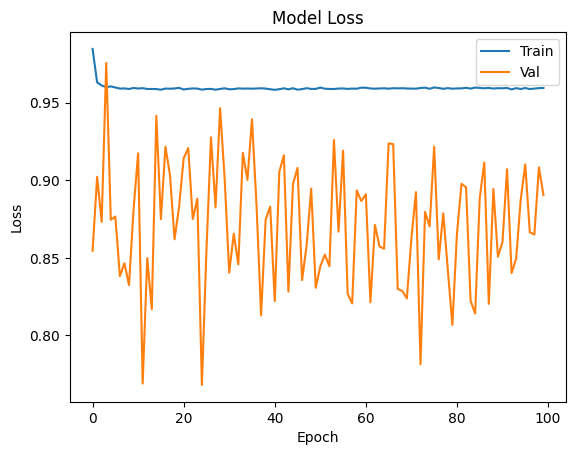

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

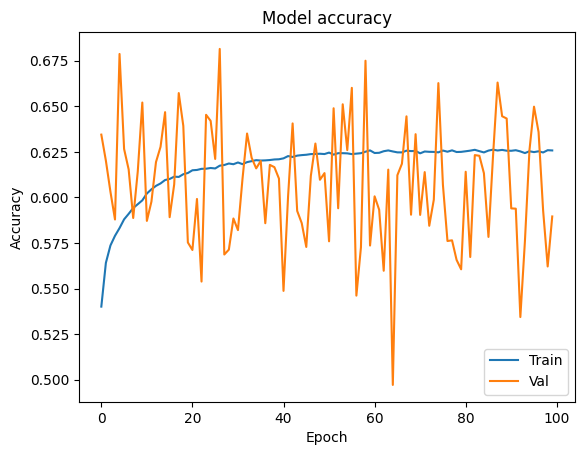

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
pred_NN=model.predict(xn_test)

212/212 [==============================] - 0s 1ms/step


In [ ]:
pred_NN

array([[7.6624817e-01, 3.1082848e-11, 2.3375177e-01],
       [6.5473132e-02, 9.3379372e-01, 7.3313876e-04],
       [4.1029009e-01, 8.2773178e-15, 5.8970988e-01],
       ...,
       [2.3018049e-02, 5.6597166e-14, 9.7698194e-01],
       [8.6628413e-01, 1.2761115e-01, 6.1047263e-03],
       [9.9677306e-01, 2.4725990e-03, 7.5433246e-04]], dtype=float32)

In [ ]:
prediction_NN = np.argmax(pred_NN, axis=1)

In [ ]:
prediction_NN

array([0, 1, 2, ..., 2, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
NN_acc=round(accuracy_score(prediction_NN,yn_test)*100,2)
NN_acc

70.77

In [ ]:
cf_matrix_NN= confusion_matrix(yn_test,prediction_NN)
cf_matrix_NN

array([[4278,  311, 1152],
       [  63,   15,   68],
       [ 335,   53,  506]])

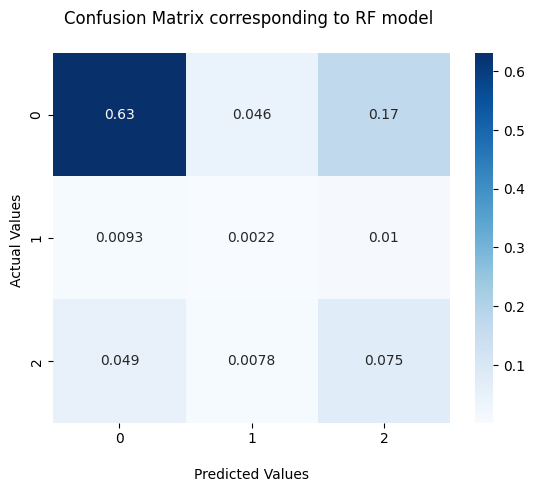

In [ ]:
ax = sb.heatmap(((cf_matrix_NN)/np.sum(cf_matrix_NN)), annot=True, cmap='Blues')

ax.set_title('Confusion Matrix corresponding to RF model \n')

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order

class_labels = ['0', '1', '2']
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

plt.show()

In [ ]:
np.unique(prediction_NN)

array([0, 2])

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_classifier = SVC(kernel='linear', decision_function_shape='ovo')

In [ ]:
svm_classifier.fit(x_train,y_train)

SVC(decision_function_shape='ovo', kernel='linear')

In [ ]:
pred_SVM=svm_classifier.predict(x_test)

In [ ]:
pred_SVM

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
SVM_acc=round(accuracy_score(pred_SVM,y_test)*100,2)
SVM_acc

85.21

In [ ]:
cf_matrix_SVM= confusion_matrix(y_test,pred_SVM)
cf_matrix_SVM

array([[41552,     0,     0],
       [  882,     0,     0],
       [ 6333,     0,     0]])

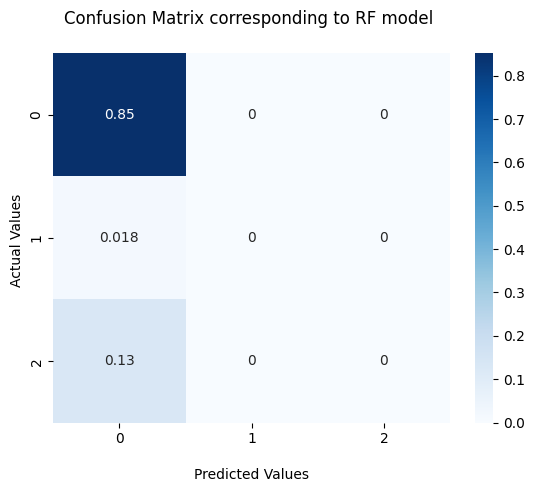

In [ ]:
ax = sb.heatmap(((cf_matrix_SVM)/np.sum(cf_matrix_SVM)), annot=True, cmap='Blues')

ax.set_title('Confusion Matrix corresponding to RF model \n')

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order

class_labels = ['0', '1', '2']
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

plt.show()

In [ ]:
repot_SVM=classification_report(y_test,pred_SVM)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(repot_SVM)

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92     41552
         1.0       0.00      0.00      0.00       882
         2.0       0.00      0.00      0.00      6333

    accuracy                           0.85     48767
   macro avg       0.28      0.33      0.31     48767
weighted avg       0.73      0.85      0.78     48767

